In [0]:
import pickle
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
data = pd.read_pickle('/content/drive/My Drive/data.pkl')

In [0]:
pd.set_option('max_columns', 110)
data.head()

,gameid,playid,team,x,y,s,a,dis,orientation,dir,nflid,displayname,jerseynumber,season,yardline,quarter,gameclock,possessionteam,down,distance,fieldposition,homescorebeforeplay,visitorscorebeforeplay,nflidrusher,offenseformation,offensepersonnel,defendersinthebox,defensepersonnel,playdirection,timehandoff,timesnap,yards,playerheight,playerweight,playerbirthdate,playercollegename,position,hometeamabbr,visitorteamabbr,week,stadium,location,stadiumtype,turf,gameweather,temperature,humidity,windspeed,winddirection,age,time_since_snap,rusher,rushx,rushy,disttorush,teamidentity,min_distancetorusher,ol_d,dl,lb,db,rb_d,qb,ol,rb,te,wr,dl_o,lb_o,db_o,yardfromowngoal,x_standard,y_standard,runsuccess,temp,avgyardspergame,mean_yards_per_rush,x_handoff,y_handoff,1_sec_x,1_5_sec_x,2_sec_x,2_5_sec_x,3_sec_x,3_5_sec_x,4_sec_x,4_5_sec_x,5_sec_x,5_5_sec_x,6_sec_x,1_sec_y,1_5_sec_y,2_sec_y,2_5_sec_y,3_sec_y,3_5_sec_y,4_sec_y,4_5_sec_y,5_sec_y,5_5_sec_y,6_sec_y,offense,eff_downfield_acc,eff_crossfield_acc
0,2017090700,20170907000118,away,73.91,34.84,1.69,1.13,0.40,278.01,272.82,496723,Eric Berry,29,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08 00:44:06+00:00,2017-09-08 00:44:05+00:00,8,72,212,1988-12-29,Tennessee,SS,NE,KC,1,Gillette Stadium,"Foxborough, MA",1.0,Field Turf,Clear and warm,63.0,77.0,8.0,SW,29,1,0,78.75,30.53,6.480872,KC,4.59331,0,2,3,6,0,1,5,1,1,3,0,0,0,35,46.09,18.493333,1,2017090700KC,5.557692,4.301493,120.0,0.0,46.200942,46.277261,46.367479,46.471595,46.589610,46.721523,46.867335,47.027045,47.200654,47.388162,47.589568,16.241064,14.691693,12.860163,10.746476,8.350631,5.672628,2.712467,0.000000,0.000000,0.000000,0.000000,0,0.055594,-1.128632
1,2017090700,20170907000118,away,74.67,32.64,0.42,1.35,0.01,332.39,251.30,2495116,Allen Bailey,97,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08 00:44:06+00:00,2017-09-08 00:44:05+00:00,8,75,288,1989-03-25,Miami,DE,NE,KC,1,Gillette Stadium,"Foxborough, MA",1.0,Field Turf,Clear and warm,63.0,77.0,8.0,SW,28,1,0,78.75,30.53,4.593310,KC,4.59331,0,2,3,6,0,1,5,1,1,3,0,0,0,35,45.33,20.693333,1,2017090700KC,5.557692,4.301493,0.0,0.0,44.978929,44.641083,44.195030,43.640770,42.978304,42.207630,41.328750,40.341663,39.246369,38.042867,36.731160,19.656138,18.658015,17.340209,15.702719,13.745546,11.468689,8.872149,5.955925,2.720018,0.000000,0.000000,0,-0.432828,-1.278734
2,2017090700,20170907000118,away,74.00,33.20,1.22,0.59,0.31,356.99,247.27,2495493,Justin Houston,50,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08 00:44:06+00:00,2017-09-08 00:44:05+00:00,8,75,270,1989-01-21,Georgia,DE,NE,KC,1,Gillette Stadium,"Foxborough, MA",1.0,Field Turf,Clear and warm,63.0,77.0,8.0,SW,28,1,0,78.75,30.53,5.448982,KC,4.59331,0,2,3,6,0,1,5,1,1,3,0,0,0,35,46.00,20.133333,1,2017090700KC,5.557692,4.301493,0.0,0.0,45.414621,45.036442,44.601272,44.109109,43.559953,42.953805,42.290665,41.570533,40.793408,39.959291,39.068181,18.735994,17.833258,16.794477,15.619652,14.308782,12.861868,11.278909,9.559905,7.704857,5.713764,3.586627,0,-0.227970,-0.544178
3,2017090700,20170907000118,away,71.46,27.70,0.42,0.54,0.02,0.23,344.36,2506353,Derrick Johnson,56,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08 00:44:06+00:00,2017-09-08 00:44:05+00:00,8,75,245,1982-11-22,Texas,ILB,NE,KC,1,Gillette Stadium,"Foxborough, MA",1.0,Field Turf,Clear and warm,63.0,77.0,8.0,SW,35,1,0,78.75,30.53,7.820038,KC,4.59331,0,2,3,6,0,1,5,1,1,3,0,0,0,35,48.54,25.633333,1,2017090700KC,5.557692,4.301493,120.0,0.0,49.204452,49.731681,50.388911,51.176143,52.093376,53.140611,54.317848,55.625086,57.062325,58.629566,60.326809,25.447315,25.299713,25.115716,24.895325,24.638538,24.345357,24.015780,23.649809,23.247443,22.808681,22.333525,0,0.520006,-0.145580
4,2017090700,20170907000118,away,69.32,35.42,1.82,2.43,0.16,347.37,285.69,2530794,Ro

In [0]:
# get future x coordinate
def future_x(df):
    '''
    requires the math package run <import math> first
    input: df - designed to be used with apply()
    calculates: new x coordinate with speed, acceleration, and direction
    Returns: new x-coordinate
    '''
    t = df['time_since_snap']
    # distance traveled = speed(time) + (acceleration/2)(time)^2
    distance = df['s']*t + df['a']/2*t**2 
    # delta x = cos(direction)  convert to radians
    dx = distance * math.cos(math.radians(df['dir'])) 
    # future = initial position + change
    new_x = df['x_standard'] + dx
    # can't have coordinates outside the boundaries
    if new_x < 0:
        new_x = 0
    elif new_x > 120:
        new_x = 120
    return new_x
    
# get future y coordinate
def future_y(df):
    '''
    input: df - designed to be used with apply()
    calculates: new y coordinate with speed, acceleration, and direction
    Returns: new y-coordinate
    '''
    t = df['time_since_snap']
    # distance traveled = speed(time) + (acceleration/2)(time)^2
    distance = df['s']*t + df['a']/2*t**2 
    # delta y = sin(direction)  convert to radians
    dy = distance * math.sin(math.radians(df['dir'])) 
    # future = initial position + change 
    new_y = df['y_standard'] + dy
    # can't have coordinates outside the boundaries
    if new_y < 0:
        new_y = 0
    elif new_y > 53.3:
        new_y = 53.3
    return new_y

In [0]:
# fix the handoff columns
data['x_handoff'] = data[['time_since_snap', 's', 'a', 'dir', 'x_standard']].apply(future_x, axis = 1)
data['y_handoff'] = data[['time_since_snap', 's', 'a', 'dir', 'y_standard']].apply(future_y, axis = 1)

In [0]:
def rushteamwinning(df):
    if df['possessionteam'] == df['hometeamabbr']:
        if df['homescorebeforeplay'] > df['visitorscorebeforeplay']:
            return 1
        else:
            return 0
    if df['possessionteam'] == df['visitorteamabbr']:
        if df['visitorscorebeforeplay'] > df['homescorebeforeplay']:
            return 1
        else:
            return 0


In [0]:
data['rush_team_winning'] = data.apply(rushteamwinning,axis = 1)

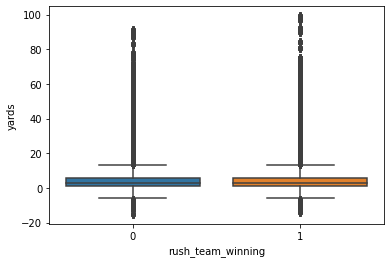

In [0]:
sns.boxplot(x = 'rush_team_winning', y = 'yards', data = data)
plt.show()

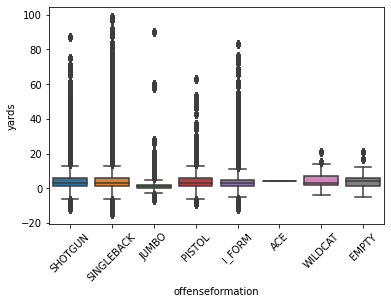

In [0]:
sns.boxplot(x = 'offenseformation', y = 'yards', data = data)
plt.xticks(rotation = 45)
plt.show()

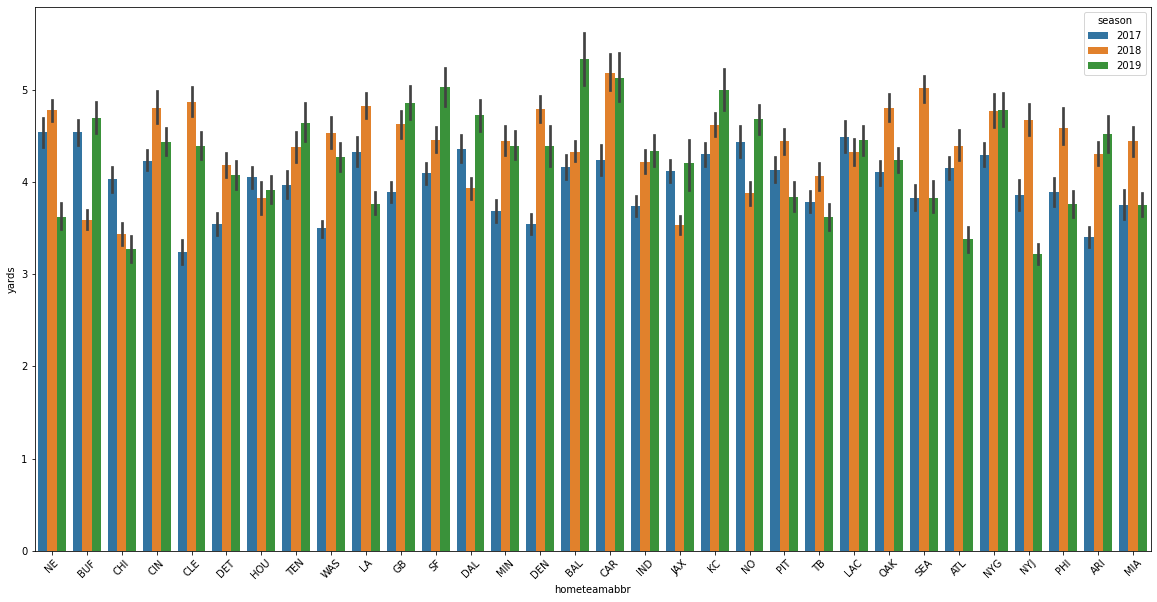

In [0]:
plt.figure(figsize = (20,10))
sns.barplot(x = 'hometeamabbr', y = 'yards', hue = 'season', data = data)
plt.xticks(rotation = 45)
plt.show()

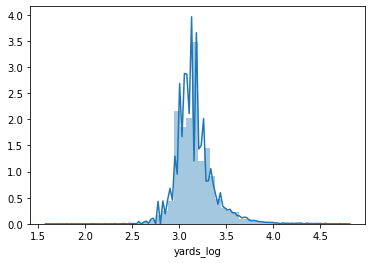

In [0]:
# add 20 to the yards so 
data["yards_log"] = np.log(data["yards"] + 20)
# to inverse the value - 
sns.distplot(data["yards_log"])
plt.show()

In [0]:
# bucket labels for classifiers
bin_categories = ['-15 to -12', '-12 to -9','-9 to -6', '-6 to -3', '-3 to 0', '0 to 3', '3 to 6', '6 to 9'
                 , '9 to 12', '12 to 15', '15 to 18', '18 to 21', '21 to 24', '24 to 27', '27 to 30', '30 to 33',
                 '33 to 36', '36 to 39', '39 to 42', '42 to 45', '45 to 48', '48 to 51', '51 to 54', '54 to 57',
                 '57 to 60', '60 to 63', '63 to 66', '66 to 69', '69 to 72', '72 to 75', '75 to 78', '78 to 81',
                 '81 to 84', '84 to 87', '87 to 90', '90 to 93', '93 to 96', '96 to 99']
# create buckets - right = false low included, high excluded
data['yards_bin'] = pd.cut(data['yards'], 38, right = False, labels = bin_categories)
data['yards_log_bin'] = pd.cut(data['yards_log'], 38, right = False, labels = bin_categories)

In [0]:
data.head()

,gameid,playid,team,x,y,s,a,dis,orientation,dir,nflid,displayname,jerseynumber,season,yardline,quarter,gameclock,possessionteam,down,distance,fieldposition,homescorebeforeplay,visitorscorebeforeplay,nflidrusher,offenseformation,offensepersonnel,defendersinthebox,defensepersonnel,playdirection,timehandoff,timesnap,yards,playerheight,playerweight,playerbirthdate,playercollegename,position,hometeamabbr,visitorteamabbr,week,stadium,location,stadiumtype,turf,gameweather,temperature,humidity,windspeed,winddirection,age,time_since_snap,rusher,rushx,rushy,disttorush,teamidentity,min_distancetorusher,ol_d,dl,lb,db,rb_d,qb,ol,rb,te,wr,dl_o,lb_o,db_o,yardfromowngoal,x_standard,y_standard,runsuccess,temp,avgyardspergame,mean_yards_per_rush,x_handoff,y_handoff,1_sec_x,1_5_sec_x,2_sec_x,2_5_sec_x,3_sec_x,3_5_sec_x,4_sec_x,4_5_sec_x,5_sec_x,5_5_sec_x,6_sec_x,1_sec_y,1_5_sec_y,2_sec_y,2_5_sec_y,3_sec_y,3_5_sec_y,4_sec_y,4_5_sec_y,5_sec_y,5_5_sec_y,6_sec_y,offense,eff_downfield_acc,eff_crossfield_acc,rush_team_winning,yards_log,yards_bin,yards_log_bin
0,2017090700,20170907000118,away,73.91,34.84,1.69,1.13,0.40,278.01,272.82,496723,Eric Berry,29,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08 00:44:06+00:00,2017-09-08 00:44:05+00:00,8,72,212,1988-12-29,Tennessee,SS,NE,KC,1,Gillette Stadium,"Foxborough, MA",1.0,Field Turf,Clear and warm,63.0,77.0,8.0,SW,29,1,0,78.75,30.53,6.480872,KC,4.59331,0,2,3,6,0,1,5,1,1,3,0,0,0,35,46.09,18.493333,1,2017090700KC,5.557692,4.301493,46.200942,16.241064,46.200942,46.277261,46.367479,46.471595,46.589610,46.721523,46.867335,47.027045,47.200654,47.388162,47.589568,16.241064,14.691693,12.860163,10.746476,8.350631,5.672628,2.712467,0.000000,0.000000,0.000000,0.000000,0,0.055594,-1.128632,0,3.332205,6 to 9,45 to 48
1,2017090700,20170907000118,away,74.67,32.64,0.42,1.35,0.01,332.39,251.30,2495116,Allen Bailey,97,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08 00:44:06+00:00,2017-09-08 00:44:05+00:00,8,75,288,1989-03-25,Miami,DE,NE,KC,1,Gillette Stadium,"Foxborough, MA",1.0,Field Turf,Clear and warm,63.0,77.0,8.0,SW,28,1,0,78.75,30.53,4.593310,KC,4.59331,0,2,3,6,0,1,5,1,1,3,0,0,0,35,45.33,20.693333,1,2017090700KC,5.557692,4.301493,44.978929,19.656138,44.978929,44.641083,44.195030,43.640770,42.978304,42.207630,41.328750,40.341663,39.246369,38.042867,36.731160,19.656138,18.658015,17.340209,15.702719,13.745546,11.468689,8.872149,5.955925,2.720018,0.000000,0.000000,0,-0.432828,-1.278734,0,3.332205,6 to 9,45 to 48
2,2017090700,20170907000118,away,74.00,33.20,1.22,0.59,0.31,356.99,247.27,2495493,Justin Houston,50,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08 00:44:06+00:00,2017-09-08 00:44:05+00:00,8,75,270,1989-01-21,Georgia,DE,NE,KC,1,Gillette Stadium,"Foxborough, MA",1.0,Field Turf,Clear and warm,63.0,77.0,8.0,SW,28,1,0,78.75,30.53,5.448982,KC,4.59331,0,2,3,6,0,1,5,1,1,3,0,0,0,35,46.00,20.133333,1,2017090700KC,5.557692,4.301493,45.414621,18.735994,45.414621,45.036442,44.601272,44.109109,43.559953,42.953805,42.290665,41.570533,40.793408,39.959291,39.068181,18.735994,17.833258,16.794477,15.619652,14.308782,12.861868,11.278909,9.559905,7.704857,5.713764,3.586627,0,-0.227970,-0.544178,0,3.332205,6 to 9,45 to 48
3,2017090700,20170907000118,away,71.46,27.70,0.42,0.54,0.02,0.23,344.36,2506353,Derrick Johnson,56,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08 00:44:06+00:00,2017-09-08 00:44:05+00:00,8,75,245,1982-11-22,Texas,ILB,NE,KC,1,Gillette Stadium,"Foxborough, MA",1.0,Field Turf,Clear and warm,63.0,77.0,8.0,SW,35,1,0,78.75,30.53,7.820038,KC,4.59331,0,2,3,6,0,1,5,1,1,3,0,0,0,35,48.54,25.633333,1,2017090700KC,5.557692,4.301493,49.204452,25.447315,49.204452,49.731681,50.388911,51.176143,52.093376,53.140611,54.317848,55.625086,57.062325,58.629566,60.326809,25.447315,25.299713,25.115716,24.89532

In [0]:
## Linear Regression

In [0]:
import statsmodels.api as sm
import statsmodels.formula.api as smf 

                            OLS Regression Results                            
Dep. Variable:                  yards   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     669.1
Date:                Fri, 29 May 2020   Prob (F-statistic):               0.00
Time:                        16:40:06   Log-Likelihood:                -94883.
No. Observations:               31006   AIC:                         1.898e+05
Df Residuals:                   30979   BIC:                         1.900e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -3.8752 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


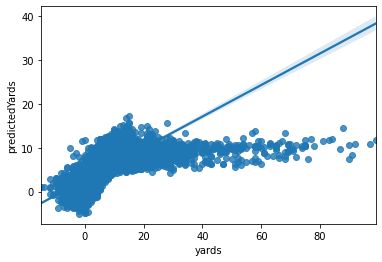

                            OLS Regression Results                            
Dep. Variable:                  yards   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     669.1
Date:                Fri, 29 May 2020   Prob (F-statistic):               0.00
Time:                        16:40:08   Log-Likelihood:                -94883.
No. Observations:               31006   AIC:                         1.898e+05
Df Residuals:                   30979   BIC:                         1.900e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -3.8752 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


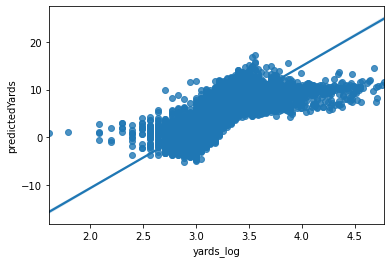

In [0]:
# linear regression on df
np.random.seed(2)
dataSet = data.drop_duplicates(subset="playid")
#model_1 = smf.ols('yards ~ ', data=dataSet).fit()
model_1 = smf.ols('yards ~ down + distance + defendersinthebox + yardfromowngoal + min_distancetorusher + ol_d + dl + lb + db + rb_d + qb + ol + rb + te + wr + dl_o + lb_o + db_o + runsuccess + avgyardspergame + mean_yards_per_rush + eff_downfield_acc + eff_crossfield_acc + x_handoff + y_handoff', data=dataSet).fit()
print(model_1.summary())
# predict yards and graph
predcitYards = dataSet.drop(columns=["yards"])
dataSet["predictedYards"] = model_1.predict(dataSet)
sns.regplot(x=dataSet["yards"],y=dataSet["predictedYards"])
plt.show()

### new cell 
np.random.seed(2)
dataSet = data.drop_duplicates(subset="playid")
model_1 = smf.ols('yards ~ down + distance + defendersinthebox + yardfromowngoal + min_distancetorusher + ol_d + dl + lb + db + rb_d + qb + ol + rb + te + wr + dl_o + lb_o + db_o + runsuccess + avgyardspergame + mean_yards_per_rush + eff_downfield_acc + eff_crossfield_acc + x_handoff + y_handoff', data=dataSet).fit()
#model_1 = smf.ols('yards_log ~ down + distance + defendersinthebox + yardfromowngoal + min_distancetorusher + ol_d + dl + lb + db + rb_d + qb + ol + rb + te + wr + dl_o + lb_o + db_o', data=dataSet).fit()
print(model_1.summary())
# predict yards and graph
predcitYards = dataSet.drop(columns=["yards_log"])
dataSet["predictedYards"] = model_1.predict(dataSet)
sns.regplot(x=dataSet["yards_log"],y=dataSet["predictedYards"])
plt.show()

                            OLS Regression Results                            
Dep. Variable:                  yards   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     197.3
Date:                Fri, 29 May 2020   Prob (F-statistic):          1.17e-287
Time:                        10:23:54   Log-Likelihood:            -1.0112e+05
No. Observations:               31006   AIC:                         2.023e+05
Df Residuals:                   30998   BIC:                         2.023e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             5.2387      0.67

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


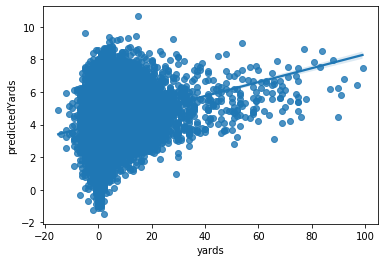

                            OLS Regression Results                            
Dep. Variable:                  yards   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     197.3
Date:                Fri, 29 May 2020   Prob (F-statistic):          1.17e-287
Time:                        10:23:58   Log-Likelihood:            -1.0112e+05
No. Observations:               31006   AIC:                         2.023e+05
Df Residuals:                   30998   BIC:                         2.023e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             5.2387      0.67

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


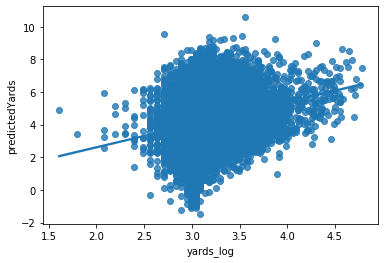

In [0]:
# linear regression on df
np.random.seed(2)
dataSet = data.drop_duplicates(subset="playid")
#model_1 = smf.ols('yards ~ ', data=dataSet).fit()
model_1 = smf.ols('yards ~ down + distance + defendersinthebox + avgyardspergame + eff_downfield_acc + x_handoff + age', data=dataSet).fit()
print(model_1.summary())
# predict yards and graph
predcitYards = dataSet.drop(columns=["yards"])
dataSet["predictedYards"] = model_1.predict(dataSet)
sns.regplot(x=dataSet["yards"],y=dataSet["predictedYards"])
plt.show()

### new cell 
np.random.seed(2)
dataSet = data.drop_duplicates(subset="playid")
model_1 = smf.ols('yards ~ down + distance + defendersinthebox + avgyardspergame + eff_downfield_acc + x_handoff + age', data=dataSet).fit()
#model_1 = smf.ols('yards ~ down + distance + defendersinthebox + yardfromowngoal + min_distancetorusher + ol_d + dl + lb + db + rb_d + qb + ol + rb + te + wr + dl_o + lb_o + db_o + runsuccess + avgyardspergame + mean_yards_per_rush + eff_downfield_acc + eff_crossfield_acc + x_handoff + y_handoff', data=dataSet).fit()
#model_1 = smf.ols('yards_log ~ down + distance + defendersinthebox + yardfromowngoal + min_distancetorusher + ol_d + dl + lb + db + rb_d + qb + ol + rb + te + wr + dl_o + lb_o + db_o', data=dataSet).fit()
print(model_1.summary())
# predict yards and graph
predcitYards = dataSet.drop(columns=["yards_log"])
dataSet["predictedYards"] = model_1.predict(dataSet)
sns.regplot(x=dataSet["yards_log"],y=dataSet["predictedYards"])
plt.show()

In [0]:
from sklearn.ensemble import RandomForestClassifier as rfc


In [0]:
# define prediction and output
cols_to_drop = ['gameid', 'playid', 'x', 'y', 'orientation', 'dir', 'nflid', 
                'season', 'nflidrusher', 'week', 'yards', 'offensepersonnel', 'defensepersonnel',
               'offenseformation', 'gameclock', 'playdirection', 'timehandoff', 'timesnap', 'playerbirthdate',
               'playercollegename', 'hometeamabbr', 'visitorteamabbr', 'stadium', 
               'location', 'stadiumtype', 'turf', 'gameweather', 'temperature', 'humidity', 'windspeed',
               'winddirection', 'rusher', 'temp', 'yards_log', 'yards_bin', 'yards_log_bin']
y = data['yards_bin']
x = data.drop(cols_to_drop, axis = 1)

# one-hot encoding
x = pd.get_dummies(x)

# get only numeric variables
x = x.select_dtypes([np.number])
x = x.fillna(0)

n_plays = 80 # number of plays in the train set

cutoff = int(len(data)/22*0.8) * 22 
print(cutoff)
Xtrain, Xtest, ytrain, ytest = x[:cutoff], x[cutoff:], y[:cutoff], y[cutoff:]

print('train x: {}'.format(Xtrain.shape))
print('test x: {}'.format(Xtest.shape))
print('train y: {}'.format(ytrain.shape))
print('test y: {}'.format(ytest.shape))

545710
train x: (545710, 2760)
test x: (136444, 2760)
train y: (545710,)
test y: (136444,)


In [0]:
clf = rfc(n_estimators = 100)
clf.fit(Xtrain, ytrain)
y_pred = clf.predict(Xtest)
errors = abs(y_pred - ytest)
acc = clf.score(Xtest, ytest)
print('Accuracy: %.2f' % acc)
print('Mean Absolute Error: %.2f' %errors.mean())

In [0]:
# reindex ytest
ytest.index = range(len(ytest))
# are predictions within 1 yard?
wr = []
for i in range(len(y_pred)):
        if abs(y_pred[i] - ytest[i]) <= 1:
            wr.append(1)
        else:
            wr.append(0)
sum(wr)/len(wr)

In [0]:
# Subset for random forest
sub = data[:2200]
# define prediction and output
cols_to_drop = ['gameid', 'playid', 'x', 'y', 'orientation', 'dir', 'nflid', 
                'season', 'nflidrusher', 'week', 'yards', 'offensepersonnel', 'defensepersonnel',
               'offenseformation', 'gameclock', 'playdirection', 'timehandoff', 'timesnap', 'playerbirthdate',
               'playercollegename', 'hometeamabbr', 'visitorteamabbr', 'stadium', 
               'location', 'stadiumtype', 'turf', 'gameweather', 'temperature', 'humidity', 'windspeed',
               'winddirection', 'rusher', 'temp', 'yards_log', 'yards_bin', 'yards_log_bin', 'runsuccess', 'displayname'
               , 'fieldposition']
y = sub['yards_bin']
x = sub.drop(cols_to_drop, axis = 1)

# one-hot encoding
x = pd.get_dummies(x)

# get only numeric variables
x = x.select_dtypes([np.number])
x = x.fillna(0)

n_plays = 80 # number of plays in the train set

cutoff = int(len(sub)/22*0.8) * 22 
print(cutoff)
Xtrain, Xtest, ytrain, ytest = x[:cutoff], x[cutoff:], y[:cutoff], y[cutoff:]

print('train x: {}'.format(Xtrain.shape))
print('test x: {}'.format(Xtest.shape))
print('train y: {}'.format(ytrain.shape))
print('test y: {}'.format(ytest.shape))

1760
train x: (1760, 97)
test x: (440, 97)
train y: (1760,)
test y: (440,)


In [0]:
clf = rfc(n_estimators = 100)
clf.fit(Xtrain, ytrain)
y_pred = clf.predict(Xtest)
#errors = abs(y_pred - ytest)
acc = clf.score(Xtest, ytest)
print('Accuracy: %.2f' % acc)
#print('Mean Absolute Error: %.2f' %errors.mean())

Accuracy: 0.33


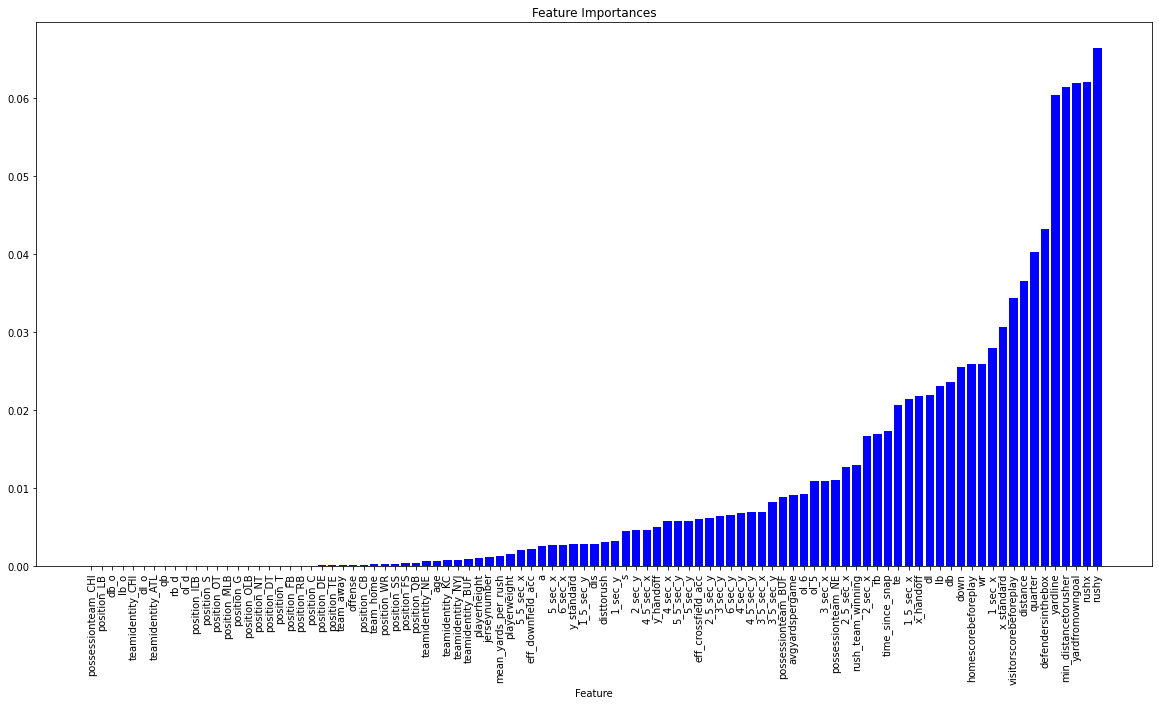

In [0]:
features = list(Xtest.columns)
importances = clf.feature_importances_
indices = np.argsort(importances)
#indices = indices[:50]

plt.figure(figsize = (20,10))
plt.title('Feature Importances')
plt.bar(range(len(indices)), importances[indices], color='b', align='center')
plt.xticks(range(len(indices)), [features[i] for i in indices], rotation = 90)
plt.xlabel('Feature')
plt.show()

In [0]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier


In [0]:
scaler = MinMaxScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.fit_transform(Xtest)

In [0]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(Xtrain, ytrain)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(Xtrain, ytrain)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(Xtest, ytest)))

Learning rate:  0.05
Accuracy score (training): 0.505
Accuracy score (validation): 0.457
Learning rate:  0.075
Accuracy score (training): 0.552
Accuracy score (validation): 0.484
Learning rate:  0.1
Accuracy score (training): 0.599
Accuracy score (validation): 0.484
Learning rate:  0.25
Accuracy score (training): 0.810
Accuracy score (validation): 0.482
Learning rate:  0.5
Accuracy score (training): 0.907
Accuracy score (validation): 0.493
Learning rate:  0.75
Accuracy score (training): 0.915
Accuracy score (validation): 0.416
Learning rate:  1
Accuracy score (training): 0.149
Accuracy score (validation): 0.289


In [0]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.25, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(Xtrain, ytrain)
predictions = gb_clf2.predict(Xtest)

print("Confusion Matrix:")
print(confusion_matrix(ytest, predictions))

print("Classification Report")
print(classification_report(ytest, predictions))

Confusion Matrix:
[[  0   0   2  42   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0  15 158   0   0   0  22   0   3   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  22   0   0   0]
 [  0   5  46  23   1   0  54   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  21   1   0   0]
 [  0   0   2   0   0   0  20   0   0   0]]
Classification Report
              precision    recall  f1-score   support

     -3 to 0       0.00      0.00      0.00        44
    -6 to -3       0.00      0.00      0.00         0
      0 to 3       0.76      0.80      0.78       198
    12 to 15       0.00      0.00      0.00         0
    21 to 24       0.00      0.00      0.00         0
    27 to 30       0.00      0.00      0.00        22
      3 to 6       0.39      0.41      0.40       132
    57 to 60       0.00      0.00      0.00         0
      6 to 9       0.00      0.00      0.0

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
## CNN
from keras.models import Sequential

from keras.layers import Dense, Conv2D, Flatten

Using TensorFlow backend.


In [0]:
# need to convert data to arrays
model = Sequential()
model.add(Conv2D(64, activation = 'relu'))